In [2]:
import numpy as n
import pandas as pd
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt
import geone
import geone.covModel as gcm
import geone.imgplot3d as imgplt3
import pyvista as pv
import sys
import os

sys.path.append("../../../")
#my modules
from ArchPy.base import *

In [3]:
exp_folder = "results/exp1"
all_sub_folders = os.listdir(exp_folder)

In [72]:
path_fold_i+"/brier_score.csv"

'results/exp1/exp1_11_0_0/brier_score.csv'

In [129]:
for ifold in range(len(all_sub_folders)):
    path_fold_i = exp_folder + "/" + all_sub_folders[ifold] + "/kl_divergence_time.csv"
    df_kl = pd.read_csv(path_fold_i, index_col=0)
    if df_kl.T.layers.values[0] == 0:
        print(all_sub_folders[ifold])

In [20]:
# get brier score
path_fold_i = exp_folder + "/" + all_sub_folders[0]
df_brier = pd.read_csv(path_fold_i+"/brier_scores.csv", index_col=0)
for i in range(1, len(all_sub_folders)):
    path_fold_i = exp_folder + "/" + all_sub_folders[i]
    try:
        df_brier_ifold = pd.read_csv(path_fold_i+"/brier_scores.csv", index_col=0)
    except:
        print("No brier score for fold ", path_fold_i)
        continue
    df_brier = pd.concat([df_brier, df_brier_ifold], axis=0)


In [24]:
df_brier

,layers,new_resolution - 2,new_resolution - 4
0,1.785496,1.498911,1.046213
1,1.837956,1.829952,1.842253
2,1.043706,1.842117,0.727480
3,1.130212,1.655770,1.474945
4,1.616726,1.933862,1.961740
...,...,...,...
195,0.675104,1.363424,1.519396
196,1.410665,1.618023,1.500668
197,0.976628,1.509235,1.250651
198,1.148536,1.294073,1.053453


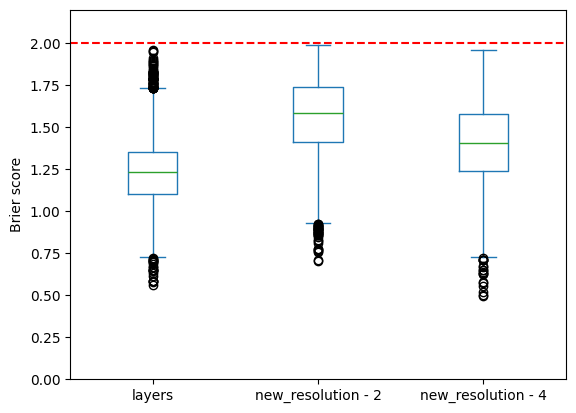

In [77]:
df_brier.plot(kind='box')
plt.ylabel("Brier score")
plt.ylim(0, 2.2)

# horizontal line at 2
plt.axhline(y=2, color='r', linestyle='--')

Text(0.5, 1.0, 'KL divergence over time')

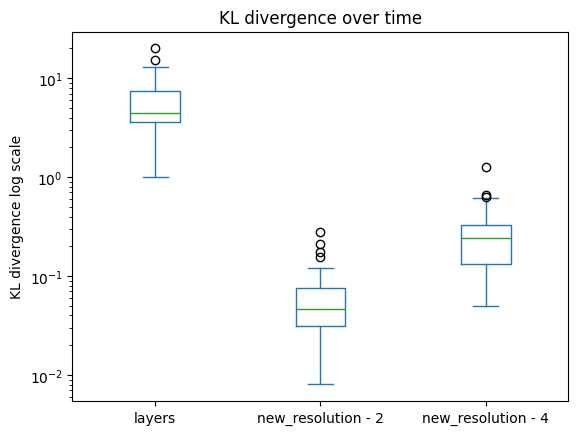

In [142]:
# get Kl on time
path_fold_i = exp_folder + "/" + all_sub_folders[0]
df_bkl_time = pd.read_csv(path_fold_i+"/kl_divergence_time.csv", index_col=0).T
for i in range(1, len(all_sub_folders)):
    path_fold_i = exp_folder + "/" + all_sub_folders[i]
    try:
        df_brier_ifold = pd.read_csv(path_fold_i+"/kl_divergence_time.csv", index_col=0).T
    except:
        print("No kl time for fold ", path_fold_i)
        continue
    df_bkl_time = pd.concat([df_bkl_time, df_brier_ifold], axis=0)

# plot
df_bkl_time.plot(kind='box')
plt.yscale('log')
plt.ylabel("KL divergence log scale")
plt.title("KL divergence over time")

Text(0.5, 1.0, 'KL divergence on distance')

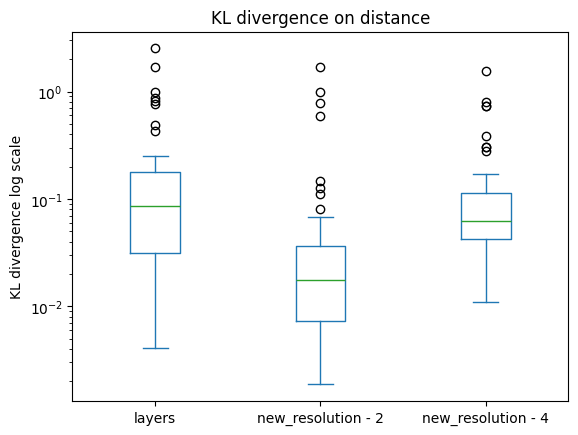

In [141]:
# get Kl on distance
path_fold_i = exp_folder + "/" + all_sub_folders[0]
df_bkl_time = pd.read_csv(path_fold_i+"/kl_divergence_distance.csv", index_col=0).T
for i in range(1, len(all_sub_folders)):
    path_fold_i = exp_folder + "/" + all_sub_folders[i]
    try:
        df_kl_dist_ifold = pd.read_csv(path_fold_i+"/kl_divergence_distance.csv", index_col=0).T
    except:
        print("No kl distance for fold ", path_fold_i)
        continue
    df_bkl_time = pd.concat([df_bkl_time, df_kl_dist_ifold], axis=0)

# plot
df_bkl_time.plot(kind='box')
plt.yscale('log')
plt.ylabel("KL divergence log scale")
plt.title("KL divergence on distance")

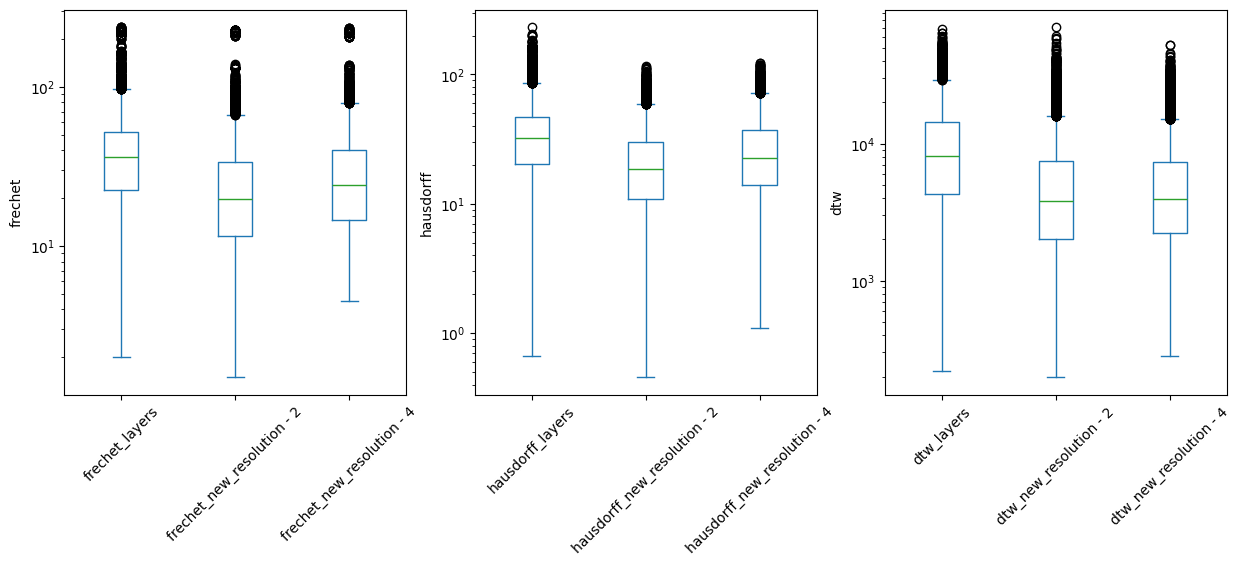

In [182]:
# get Kl on distance
path_fold_i = exp_folder + "/" + all_sub_folders[0]
df_path_distances = pd.read_csv(path_fold_i+"/distances.csv", index_col=0)

for i in range(1, len(all_sub_folders)):
    path_fold_i = exp_folder + "/" + all_sub_folders[i]
    try:
        df_dist_ifold = pd.read_csv(path_fold_i+"/distances.csv", index_col=0)
    except:
        print("No kl distance for fold ", path_fold_i)
        continue
    df_path_distances = pd.concat([df_path_distances, df_dist_ifold], axis=0)

# 3 plots, one for each distance
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
df_path_distances.iloc[:, 0:3].plot(kind='box', ax=ax[0])
df_path_distances.iloc[:, 3:6].plot(kind='box', ax=ax[1])
df_path_distances.iloc[:, 6:9].plot(kind='box', ax=ax[2])

distances = ["frechet", "hausdorff", "dtw"]
o = 0
for axi in ax:

    # rotate xticks
    axi.set_xticklabels(axi.get_xticklabels(), rotation=45)
    axi.set_ylabel(distances[o])
    axi.set_yscale('log')
    o += 1

In [16]:
# max time and distance
n_modes = 4
times = []
for imode in range(4):
    time_mode = []
    for ifold in range(len(all_sub_folders)):
        path_fold_i = exp_folder + "/" + all_sub_folders[ifold] + "/l_df_pi.pkl"
        l_df_pi = pd.read_pickle(path_fold_i)
        time_mode += [l_df_pi[imode][i].time.iloc[-1] for i in range(200) if l_df_pi[imode][i] is not None]
    times.append(time_mode)


In [17]:
mode_names = ["reference", "layers", "new_resolution - 2", "new_resolution - 4"]

Text(0, 0.5, 'Time log(d)')

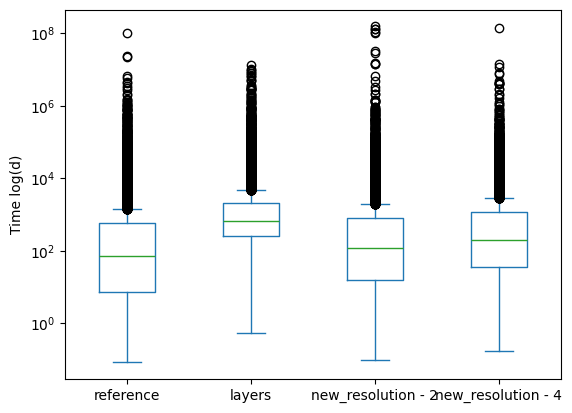

In [145]:
df_times = pd.DataFrame(times, index=mode_names).T
df_times.plot(kind='box')
plt.yscale('log')
plt.ylabel("Time log(d)")

In [ ]:
# max distance
n_modes = 4
distances = []
for imode in range(n_modes):
    distance_mode = []
    for ifold in range(len(all_sub_folders)):
        path_fold_i = exp_folder + "/" + all_sub_folders[ifold] + "/l_df_pi.pkl"
        l_df_pi = pd.read_pickle(path_fold_i)
        distance_mode += [l_df_pi[imode][i].cum_distance.iloc[-1] for i in range(200) if l_df_pi[imode][i] is not None]
    distances.append(distance_mode)

In [127]:
%matplotlib inline

Text(0, 0.5, 'Distance')

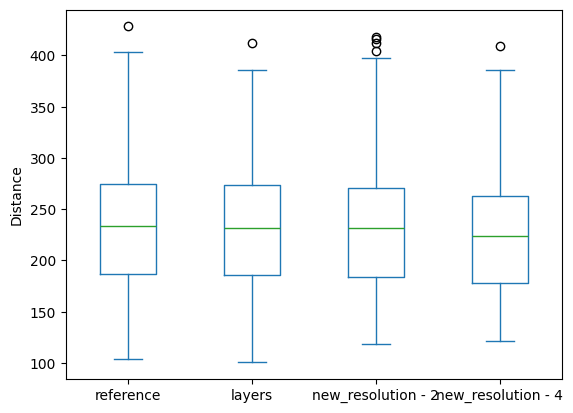

In [ ]:
df_distances = pd.DataFrame(distances, index=mode_names).T
df_distances.values[df_distances.values < 100] = np.nan
df_distances.plot(kind='box')
plt.ylabel("Distance (m)")